# Deutsch Algorithm

Es un algoritmo que nos permitirá entender las ventajas del cómputo cuántico, sobre computadores clásicos. Trabajamos con dos funciones que reciben valores de 0 o 1, y tienen 4 posibles estados, [`0,0`],[`0,1`],[`1,0`], [`1,1`], a aquellos valores que no dependen de las entradas y resultan en ambos valores iguales se les dice constantes, a a quellos que el input si afecta, se les llama balanceados.

Digamos que tenemos dos qubits, **input register**, **output register**, $\ket{x}$ y $\ket{y}$ los cuales inteactúan con una función $U_f$, o una caja negra. El simbolo $\oplus$ significa que está sucediendo una suma, o el operador XOR


$$\ket{x} \ket{y}  \xrightarrow{\text{U}}\ket{x} \ket{y \oplus  f(x)}$$
$$  \xrightarrow{\text{U}}\ket{x} \ket{y \oplus f(x)}\oplus f(x)$$
$$\ket{x} \ket{y \oplus 0}$$
$$\ket{x} \ket{y}$$





Vamos a realizar una arpoximación incorrecta para llegar a una respuesta correcta, como podemos ver en el diagrama, U corresponde a una caja negra.

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.tools.visualization import circuit_drawer

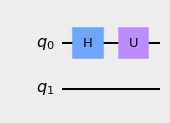

In [2]:
# Customize function X for U
qc = QuantumCircuit(1, name='U')
qc.x(0)
custom_gate = qc.to_instruction()

new_circ = QuantumCircuit(2)
new_circ.h(0)

new_circ.append(custom_gate, [0])
new_circ.draw(output='mpl', style={'backgroundcolor': '#EEEEEE'})

Supongamos que partimos de dos qubits con estados $\ket{+}$  $\ket{0}$. De operar de esta manera tenemos que si aplicamos la función U a los estados sucede:

$$U_f (\ket{+}\otimes\ket{0})  \xrightarrow U_f \left(\frac{1}{\sqrt{2}}\ket{0} + \ket{1}\right) \otimes\ket{0}$$

$$\frac{1}{\sqrt{2}} U_f \ket{0} \otimes \ket{0} + \frac{1}{\sqrt{2}} U_f \ket{1} \otimes \ket{0}$$

$$\frac{1}{\sqrt{2}} \ket{0} f(0) \oplus \ket{0} + \frac{1}{\sqrt{2}} \ket{1}f(1)  \oplus \ket{0}$$


- Cuando la compeurta XOR se aplica a 0, devuelve 0. La expresión final tiene f(0) y f(1), no nos sirve porque solo tiene una probabilidad de 50%. Debemos de aplicar la compuerta de Hadamard al segundo qubit.

## Algoritmo Deutsch



Supongamos que tenemos dos qubits en los estados superpuestos de $\ket{+}$ $\ket{-}$. A ambos se le aplica una compuerta Hadamard y X, junto la función U.

In [3]:
n = 2
q = QuantumRegister(n)
c = ClassicalRegister(n)
qc = QuantumCircuit(q,c)

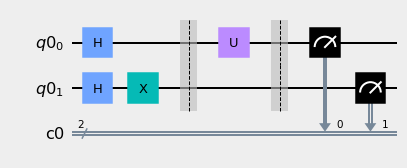

In [4]:
qc.h(q)
qc.x(q[1])
qc.barrier()

# U function
custom_circ = QuantumCircuit(1, name='U')
custom_gate = custom_circ.to_instruction()
qc.append(custom_gate,[0])

qc.barrier()
qc.measure(q,c)
qc.draw(output='mpl', style={'backgroundcolor': '#EEEEEE'})

Los qubits en su estado inicial.
$$\ket{+} \ket{-}$$

Los qubits con ambas compuertas operando.
$$ \ket{\psi_1}= \frac{1}{2} \left(\ket{0}+\ket{1}\right)\otimes\left(\ket{0}-\ket{1}\right)$$

$$ \ket{\psi_1}= \frac{1}{2} \left(\ket{0}\ket{0}-\ket{0}\ket{1}+\ket{1}\ket{0}-\ket{1}\ket{1}\right)$$


$$ \ket{\psi_1}= \frac{1}{2} \left(\ket{0}\ket{0}-\ket{0}\ket{1}+\ket{1}\ket{0}-\ket{1}\ket{1}\right)$$
